In [65]:
import pandas as pd
df = pd.read_excel('/Users/farrelmanazilin/Document/kuliah/data/quiz.xlsx')
df.head(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Nama lengkap   100 non-null    object
 1   Jurusan        100 non-null    object
 2   Program Studi  100 non-null    object
 3   Angkatan       100 non-null    int64 
 4   x1             100 non-null    int64 
 5   x2             100 non-null    int64 
 6   x3             100 non-null    int64 
 7   x4             100 non-null    int64 
 8   x5             100 non-null    int64 
 9   x6             100 non-null    int64 
 10  x7             100 non-null    int64 
 11  x8             100 non-null    int64 
 12  x9             100 non-null    int64 
 13  x10            100 non-null    int64 
 14  x11            100 non-null    int64 
 15  x12            100 non-null    int64 
 16  x13            100 non-null    int64 
 17  x14            100 non-null    int64 
 18  x15            100 non-null    

In [66]:
kolom_yang_ingin_disimpan = ['Nama lengkap', 'Jurusan', 'Program Studi', 'Angkatan']
data = df[kolom_yang_ingin_disimpan].copy()
print(data)

              Nama lengkap                Jurusan Program Studi  Angkatan
0             Abdul Muffid     Sains Data Terapan            D4      2022
1        Abdullah Shalihin  Teknik Telekomunikasi            D4      2022
2           Adira callysta     Teknik Informatika            D3      2022
3   Aflah Vawwazsyah Nabil        Teknik Komputer            D4      2022
4         Ahmad Zen Ashari     Teknik Elektronika            D4      2022
..                     ...                    ...           ...       ...
95          Faris Muhammad     Teknik Informatika            D4      2022
96        Fernando Michael     Teknik Informatika            D4      2022
97    Alif Naufal Muhammad     Teknik Informatika            D4      2022
98      Roby Arjuna Wijaya     Teknik Informatika            D4      2022
99           Rizal Maulana     Teknik Informatika            D4      2022

[100 rows x 4 columns]


In [67]:
dfq = df.drop(columns=['Nama lengkap', 'Jurusan', 'Program Studi', 'Angkatan'])

In [68]:
dfq

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18
0,1,3,2,4,5,3,2,4,2,3,1,2,2,4,1,4,4,2
1,3,5,3,4,4,4,4,4,4,4,4,3,3,1,3,5,5,3
2,5,5,5,3,3,3,5,3,5,4,5,3,3,2,3,3,3,3
3,3,4,3,4,4,4,4,5,5,4,4,3,4,1,3,4,4,4
4,5,1,4,5,5,5,5,4,4,3,3,4,4,4,3,5,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,4,2,1,5,3,5,5,4,4,5,4,4,3,4,5,5,4
96,4,5,3,4,4,4,3,3,3,4,4,4,5,5,5,5,5,5
97,5,5,5,5,5,5,5,4,5,4,3,3,4,4,5,5,5,4
98,5,4,3,4,4,4,5,4,4,4,3,4,4,5,5,4,4,5


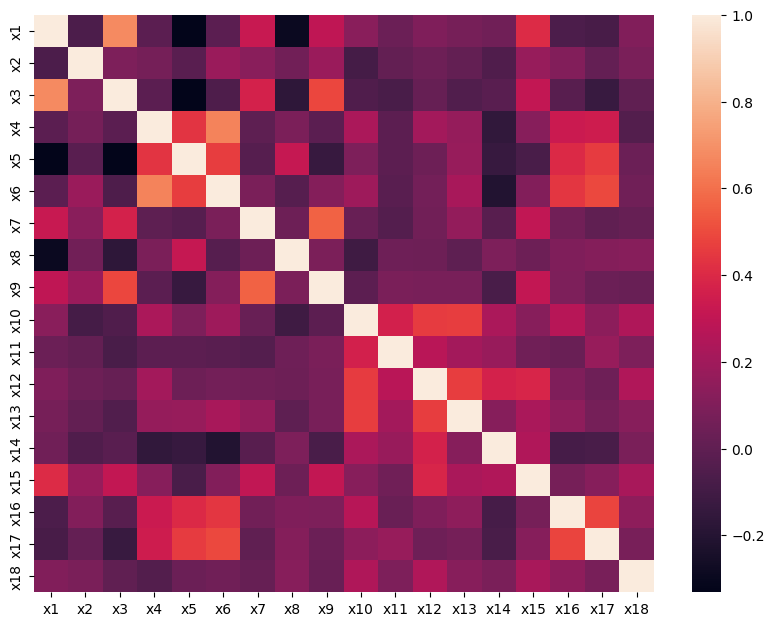

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix=dfq.corr()
fig = plt.figure(figsize=(10,7.5))
sns.heatmap(corr_matrix)
plt.show()

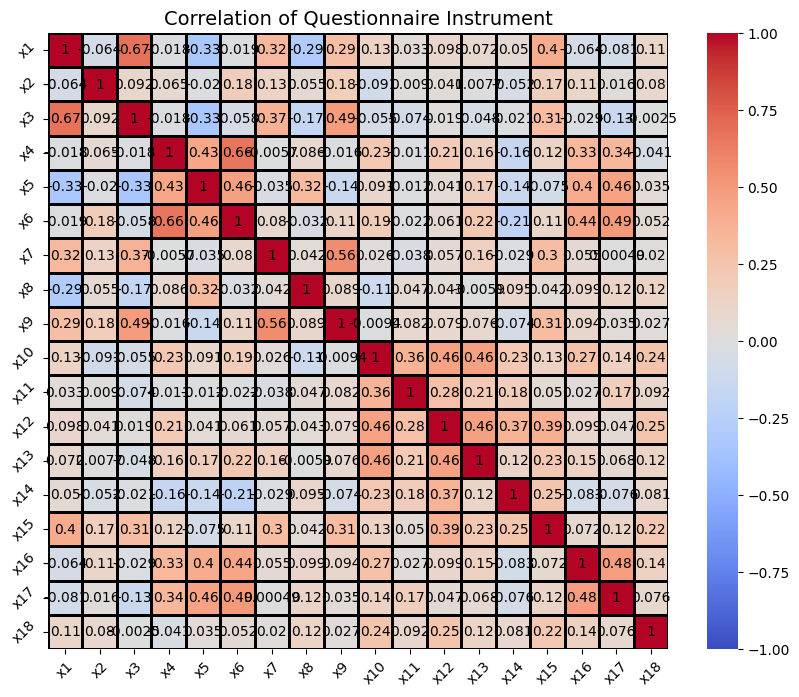

In [70]:
fig = plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,
            cmap='coolwarm',
            linewidths=0.75,
            linecolor='black',
            cbar=True,
            vmin=-1,
            vmax=1,
            annot=True,
            annot_kws={'size': 10, 'color': 'black'})
plt.tick_params(labelsize=10, rotation=45)
plt.title('Correlation of Questionnaire Instrument', size=14)
plt.savefig("corr_quest.png")


In [71]:
import scipy.stats as stats

# Buat fungsi untuk menghitung korelasi dan menguji korelasi
def lwise_corr_pvalues(df, to_csv=False, file_name=None, method=None):
    df = df.dropna(how='any')._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    rvalues = dfcols.transpose().join(dfcols, how='outer')
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    length = str(len(df))
    
    if method is None:
        test = stats.pearsonr
        test_name = "Pearson"
    elif method == "spearman":
        test = stats.spearmanr
        test_name = "Spearman Rank"
    elif method == "kendall":
        test = stats.kendalltau
        test_name = "Kendall's Tau-b"
    
    for r in df.columns:
        for c in df.columns:
            rvalues[r][c] = round(test(df[r], df[c])[0], 4)
    
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = format(test(df[r], df[c])[1], '.4f')
    
    if not to_csv:
        print("Correlation test conducted using list-wise deletion",
              "\n",
              "Total observations used: ", length, "\n", "\n",
              f"{test_name} Correlation Values", "\n", rvalues, "\n",
              "Significant Levels", "\n", pvalues)
    if to_csv:
        print("Correlation test conducted using list-wise deletion",
              "\n",
              "Total observations used: ", length, "\n", "\n",
              f"{test_name} Correlation Values", "\n", rvalues, "\n",
              "Significant Levels", "\n", pvalues)
        file = open(file_name, 'a')
        file.write("Correlation test conducted using list-wise deletion" + "\n" + f"{test_name} correlation values" + "\n")
        file.write("Total observations used: " + length + "\n")
        file.close()
        rvalues.to_csv(file_name, header=True, mode='a')
        file = open(file_name, 'a')
        file.write("p-values" + "\n")
        file.close()
        pvalues.to_csv(file_name, header=True, mode='a')
lwise_corr_pvalues(dfq)

Correlation test conducted using list-wise deletion 
 Total observations used:  100 
 
 Pearson Correlation Values 
          x1      x2      x3      x4      x5      x6      x7      x8      x9   
x1      1.0 -0.0642  0.6729 -0.0185 -0.3265 -0.0189  0.3238 -0.2911  0.2939  \
x2  -0.0642     1.0   0.092   0.065 -0.0203  0.1794  0.1307  0.0551  0.1829   
x3   0.6729   0.092     1.0 -0.0183 -0.3314 -0.0578  0.3706 -0.1688  0.4891   
x4  -0.0185   0.065 -0.0183     1.0  0.4348  0.6567 -0.0057  0.0857 -0.0163   
x5  -0.3265 -0.0203 -0.3314  0.4348     1.0  0.4619 -0.0348  0.3186 -0.1383   
x6  -0.0189  0.1794 -0.0578  0.6567  0.4619     1.0  0.0796 -0.0325  0.1132   
x7   0.3238  0.1307  0.3706 -0.0057 -0.0348  0.0796     1.0  0.0421  0.5612   
x8  -0.2911  0.0551 -0.1688  0.0857  0.3186 -0.0325  0.0421     1.0  0.0887   
x9   0.2939  0.1829  0.4891 -0.0163 -0.1383  0.1132  0.5612  0.0887     1.0   
x10  0.1263  -0.091 -0.0553  0.2339   0.091  0.1915  0.0256 -0.1114 -0.0094   
x11  0.0329   

In [72]:
import pingouin as pg
pg.cronbach_alpha(data=dfq)

(0.6810967845361617, array([0.582, 0.765]))

In [73]:
# Import required libraries
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [74]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(dfq)
chi_square_value, p_value

(535.407906674611, 6.828111685760123e-44)

In [75]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(dfq)
kmo_model

0.67062053227537

In [76]:
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(n_factors=25, rotation=None)
fa.fit(dfq)
ev, v = fa.get_eigenvalues()
ev


array([3.29588876, 2.93678168, 2.12907154, 1.39467038, 1.02619285,
       0.9981581 , 0.9801813 , 0.89078559, 0.72413397, 0.63926696,
       0.53526037, 0.49977199, 0.42567203, 0.41201977, 0.35009728,
       0.32358049, 0.24427182, 0.19419511])

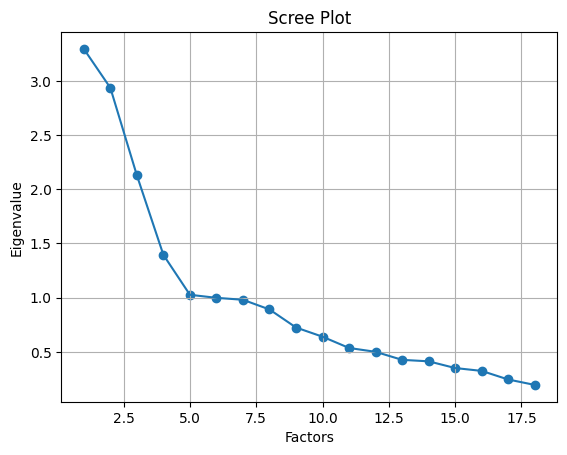

In [77]:
plt.scatter(range(1,dfq.shape[1]+1),ev)
plt.plot(range(1,dfq.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [78]:
fa = FactorAnalyzer(n_factors=2, rotation="varimax")

fa.fit(dfq)

loadings = fa.loadings_
loadings

array([[-0.10593904,  0.71223679],
       [ 0.10734745,  0.11854602],
       [-0.17449787,  0.68310548],
       [ 0.62669011, -0.03278649],
       [ 0.63959605, -0.37347908],
       [ 0.7032575 , -0.01735002],
       [ 0.07286225,  0.5002908 ],
       [ 0.16918047, -0.14323828],
       [ 0.0655898 ,  0.54171778],
       [ 0.42059718,  0.2186853 ],
       [ 0.17661016,  0.12079789],
       [ 0.34547082,  0.3310859 ],
       [ 0.3965478 ,  0.24150539],
       [-0.02230501,  0.17190164],
       [ 0.22176622,  0.58190854],
       [ 0.59204122, -0.01367043],
       [ 0.5965114 , -0.09868958],
       [ 0.18603289,  0.16978343]])

In [79]:
fa = FactorAnalyzer(n_factors=4, rotation="varimax")

fa.fit(dfq)

loadings = fa.loadings_
loadings

array([[-1.12507272e-01,  5.12309971e-01,  1.33971006e-01,
        -5.98653544e-01],
       [ 9.79629499e-02,  2.33688770e-01, -2.04618364e-02,
         1.15329040e-01],
       [-1.35638251e-01,  6.72444798e-01, -6.67512045e-02,
        -4.29117246e-01],
       [ 6.78351584e-01,  1.63879412e-02,  8.99798959e-02,
        -5.87088999e-02],
       [ 6.41355884e-01, -1.51473167e-01,  2.07740600e-02,
         3.70950550e-01],
       [ 8.57783956e-01,  9.75880298e-02,  2.84671793e-04,
        -9.05361861e-02],
       [ 2.98259440e-02,  6.30202474e-01,  4.13343234e-02,
        -1.02959482e-03],
       [ 6.77686362e-02,  9.64651501e-02,  5.81082972e-02,
         6.04845236e-01],
       [ 2.37642883e-02,  7.40751753e-01,  1.90005969e-02,
         3.24827490e-02],
       [ 2.43631208e-01, -9.94851145e-02,  6.75101150e-01,
        -2.17008900e-01],
       [ 1.00312764e-02, -3.21645120e-02,  4.00934037e-01,
         2.35772159e-02],
       [ 6.31118503e-02,  9.37699770e-02,  7.56402410e-01,
      

In [80]:
from sklearn.cluster import KMeans
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
label_Kmeans = kmeans.fit_predict(dfq)
label_Kmeans

/Users/farrelmanazilin/tomatopotato/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int32)

In [81]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

dbi = davies_bouldin_score(dfq, label_Kmeans)
print(f"Davies-Bouldin Index: {dbi}")
silhouette_avg = silhouette_score(dfq, label_Kmeans)
print(f"Silhouette Score: {silhouette_avg}")

Davies-Bouldin Index: 2.5552098945838213
Silhouette Score: 0.11223523769230459


In [82]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42) 
pca_vecs = pca.fit_transform(dfq) 
km_1 = pca_vecs[:, 0]
km_2 = pca_vecs[:, 1]
data['pca_1'] = km_1
data['pca_2'] = km_2
data['cluster Kmeans'] = label_Kmeans
print(data)

              Nama lengkap                Jurusan Program Studi  Angkatan   
0             Abdul Muffid     Sains Data Terapan            D4      2022  \
1        Abdullah Shalihin  Teknik Telekomunikasi            D4      2022   
2           Adira callysta     Teknik Informatika            D3      2022   
3   Aflah Vawwazsyah Nabil        Teknik Komputer            D4      2022   
4         Ahmad Zen Ashari     Teknik Elektronika            D4      2022   
..                     ...                    ...           ...       ...   
95          Faris Muhammad     Teknik Informatika            D4      2022   
96        Fernando Michael     Teknik Informatika            D4      2022   
97    Alif Naufal Muhammad     Teknik Informatika            D4      2022   
98      Roby Arjuna Wijaya     Teknik Informatika            D4      2022   
99           Rizal Maulana     Teknik Informatika            D4      2022   

       pca_1     pca_2  cluster Kmeans  
0   4.050992  1.027255            

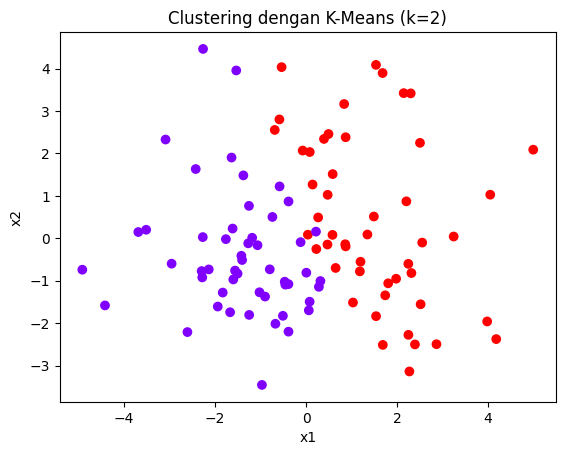

In [83]:
import matplotlib.pyplot as plt
plt.scatter(data['pca_1'], data['pca_2'], c=data['cluster Kmeans'], cmap='rainbow')
plt.title("Clustering dengan K-Means (k=2)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

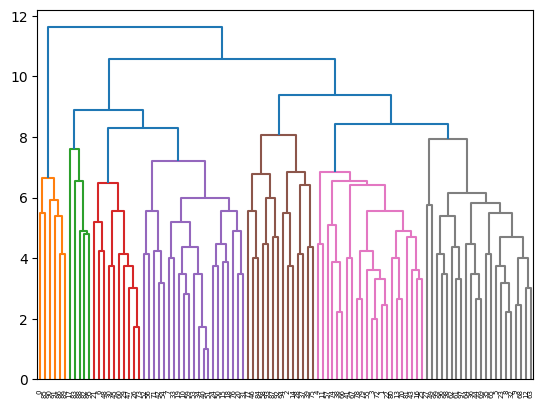

[1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0]


In [84]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage

n_clusters = 2
model = AgglomerativeClustering(n_clusters=n_clusters)
label_hie = model.fit_predict(dfq)

linkage_matrix = linkage(dfq, method='complete')  
dendrogram(linkage_matrix)
plt.show()

print(label_hie)

In [85]:
dbi = davies_bouldin_score(dfq, label_hie)
print(f"Davies-Bouldin Index: {dbi}")
silhouette_avg = silhouette_score(dfq, label_hie)
print(f"Silhouette Score: {silhouette_avg}")

Davies-Bouldin Index: 2.3625970344952156
Silhouette Score: 0.13848218525440983


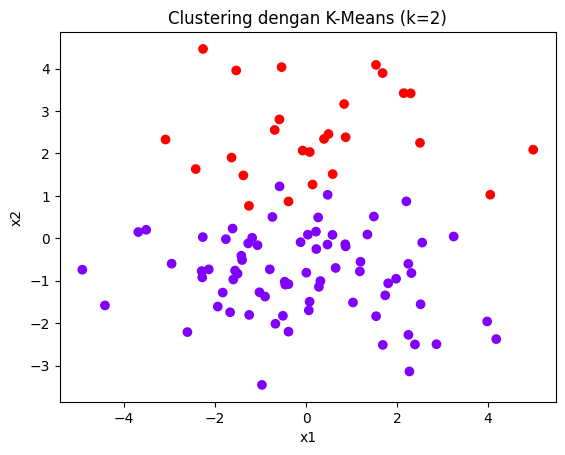

In [86]:
import matplotlib.pyplot as plt
plt.scatter(data['pca_1'], data['pca_2'], c=label_hie, cmap='rainbow')
plt.title("Clustering dengan K-Means (k=2)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [87]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=n_clusters)
label_algo= model.fit_predict(dfq)

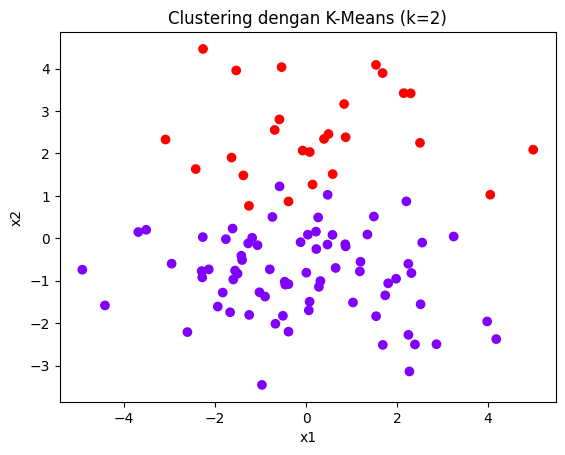

In [88]:
import matplotlib.pyplot as plt
plt.scatter(data['pca_1'], data['pca_2'], c=label_algo, cmap='rainbow')
plt.title("Clustering dengan K-Means (k=2)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [62]:
merged_data = dfq.join(data['cluster Kmeans'], on=dfq.index)
merged_data

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,cluster Kmeans
0,1,3,2,4,5,3,2,4,2,3,1,2,2,4,1,4,4,2,0
1,3,5,3,4,4,4,4,4,4,4,4,3,3,1,3,5,5,3,1
2,5,5,5,3,3,3,5,3,5,4,5,3,3,2,3,3,3,3,1
3,3,4,3,4,4,4,4,5,5,4,4,3,4,1,3,4,4,4,1
4,5,1,4,5,5,5,5,4,4,3,3,4,4,4,3,5,5,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,4,2,1,5,3,5,5,4,4,5,4,4,3,4,5,5,4,1
97,4,5,3,4,4,4,3,3,3,4,4,4,5,5,5,5,5,5,1
98,5,5,5,5,5,5,5,4,5,4,3,3,4,4,5,5,5,4,1
99,5,4,3,4,4,4,5,4,4,4,3,4,4,5,5,4,4,5,1


In [89]:
mean_clust_kmeans = merged_data.groupby('cluster Kmeans', as_index=False).mean()
mean_clust_kmeans

,cluster Kmeans,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18
0,0,2.30000,3.680000,2.200000,3.680000,4.080000,3.780000,2.800000,3.360000,2.680000,3.460000,3.680000,2.900000,3.480000,2.860000,2.240000,3.860000,3.740000,2.920000
1,1,3.45098,4.215686,3.196078,4.058824,4.019608,4.254902,4.078431,3.745098,4.019608,3.745098,3.882353,3.509804,4.039216,2.862745,3.686275,4.156863,4.078431,3.215686


In [90]:
data['cluster Kmeans'] = data['cluster Kmeans'].replace({0: 'Tidak Puas', 1: 'Puas'})
data

,Nama lengkap,Jurusan,Program Studi,Angkatan,pca_1,pca_2,cluster Kmeans
0,Abdul Muffid,Sains Data Terapan,D4,2022,4.050992,1.027255,Puas
1,Abdullah Shalihin,Teknik Telekomunikasi,D4,2022,-0.387561,-1.079928,Tidak Puas
2,Adira callysta,Teknik Informatika,D3,2022,-3.090403,2.327681,Tidak Puas
3,Aflah Vawwazsyah Nabil,Teknik Komputer,D4,2022,-0.797828,-0.731485,Tidak Puas
4,Ahmad Zen Ashari,Teknik Elektronika,D4,2022,-2.282510,-0.921650,Tidak Puas
...,...,...,...,...,...,...,...
95,Faris Muhammad,Teknik Informatika,D4,2022,-0.119876,-0.091229,Tidak Puas
96,Fernando Michael,Teknik Informatika,D4,2022,-2.296086,-0.772497,Tidak Puas
97,Alif Naufal Muhammad,Teknik Informatika,D4,2022,-4.422371,-1.581601,Tidak Puas
98,Roby Arjuna Wijaya,Teknik Informatika,D4,2022,-3.516454,0.201150,Tidak Puas


In [92]:
data.to_excel('yes1.xlsx', index=False)